In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
pg = sns.load_dataset("penguins")
pg = pg.dropna()

In [3]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
pg_train, pg_test = train_test_split(pg, test_size=0.3, random_state=42, stratify=pg['species'])
print(pg_train.shape, pg_test.shape)

(233, 7) (100, 7)


In [6]:
features= ['body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(pg_train[features], pg_train['species'])

DecisionTreeClassifier(max_depth=10)

In [7]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [8]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [9]:
predictionsOnTrainset = dt_classification.predict(pg_train[features])
predictionsOnTestset = dt_classification.predict(pg_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, pg_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, pg_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.776824034334764
Accuracy on test set 0.66


## Is the accuracy different? Did you expect this difference?
There is a difference in accuracy, the test set is smaller, so it isn't able to predict as accurately as the training set.

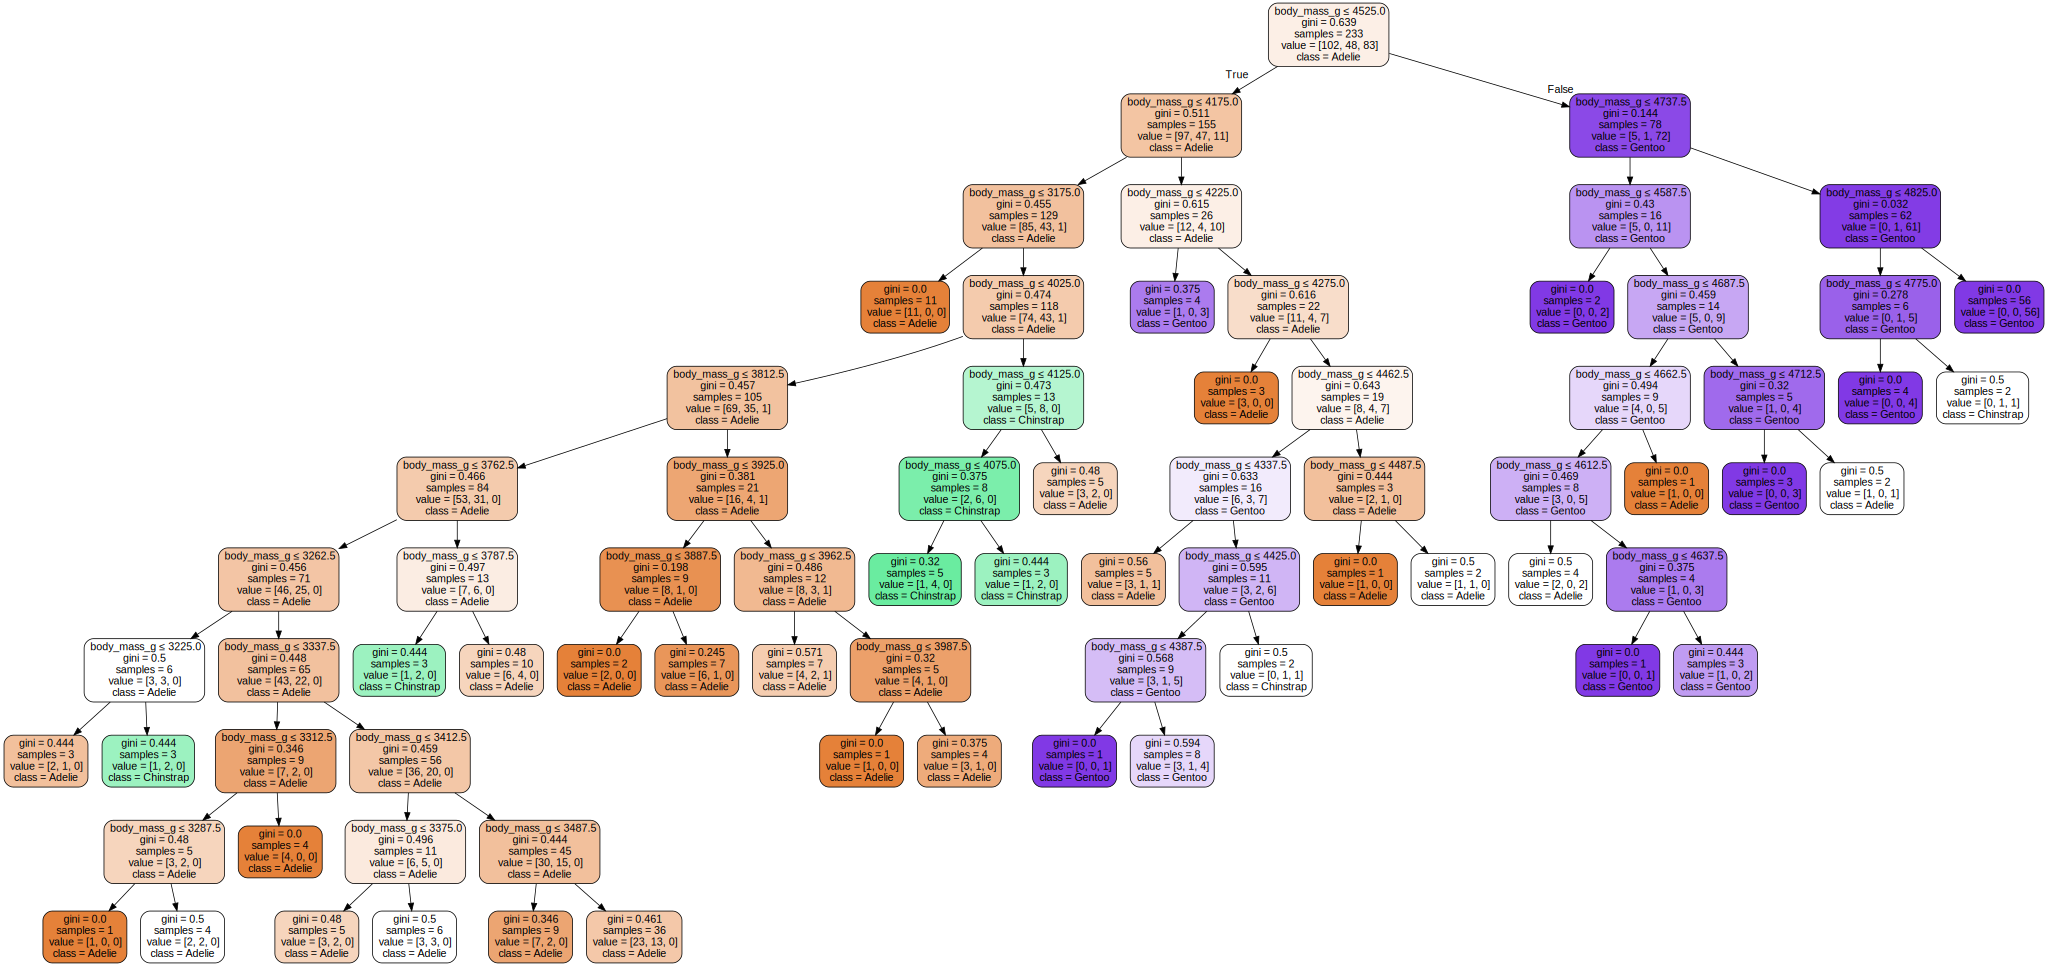

In [10]:
plot_tree_classification(dt_classification, features, np.sort(pg.species.unique()))